<a href="https://colab.research.google.com/github/Hebah19/CodSoft/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prediction of customer churn for a subscription-
based service or business.

In [52]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import joblib

**loading the dataset to pandas Dataframe**

In [4]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# No of rows and columns
dataset.shape

(10000, 14)

** Finding missing values**

In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Dropping irrelevant features**

In [8]:
New_dataset =dataset.drop(['RowNumber','CustomerId','Surname'], axis =1)
New_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data Visulaization**

Male      5457
Female    4543
Name: Gender, dtype: int64


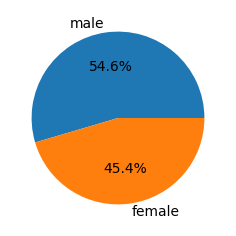

In [9]:
from seaborn.rcmod import palettes
fig1 = plt.figure()
ax = fig1.add_axes([0,0,0.45,0.45])
labels = ['male','female']
Num = New_dataset['Gender'].value_counts()
print(Num)
ax.pie(Num, labels=labels, autopct='%1.1f%%')
plt.show()

In [10]:
geo = New_dataset['Geography'].value_counts()
print(geo)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


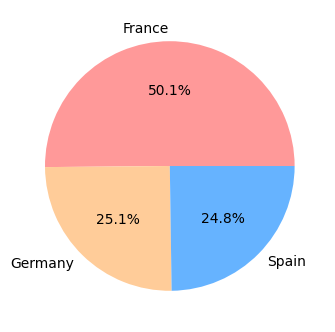

In [11]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,0.65,0.65])
colors =[ '#ff9999', '#ffcc99','#66b3ff']
labels = ['France','Germany','Spain']
ax1.pie(geo, labels=labels, autopct='%1.1f%%', colors=colors)
plt.show()

<Axes: xlabel='Exited', ylabel='count'>

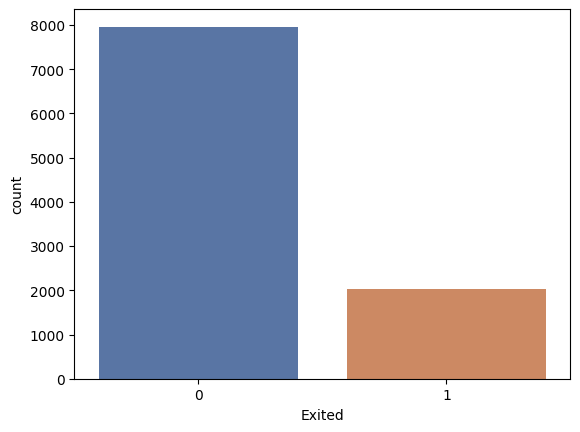

In [12]:
sns.countplot(x='Exited', data=New_dataset, palette='deep')

<Axes: xlabel='Geography', ylabel='Exited'>

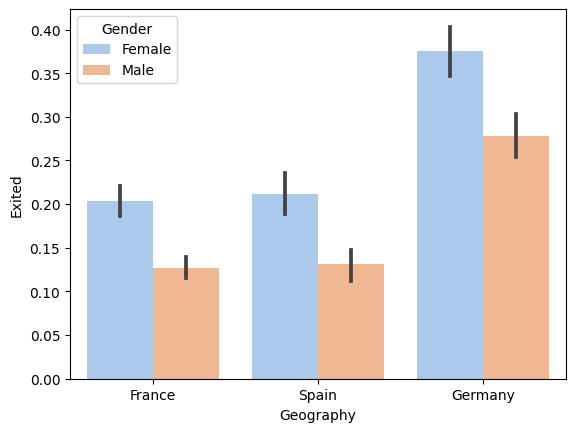

In [13]:
sns.barplot(x= 'Geography', y = 'Exited',hue='Gender', data = New_dataset, palette='pastel')

In [14]:
New_dataset['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

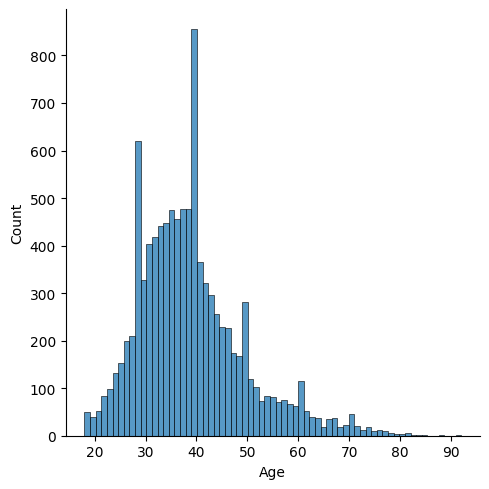

In [15]:
sns.displot(New_dataset['Age'])

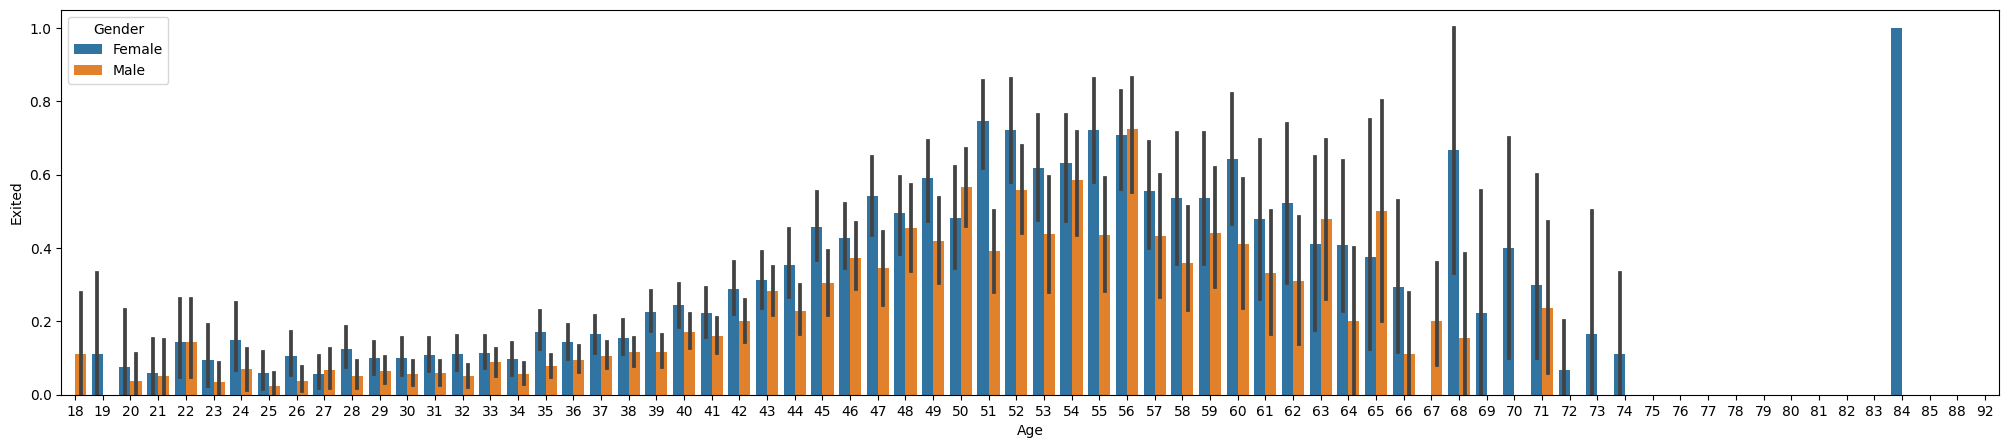

In [16]:
plt.figure(figsize=(25, 5))
sns.barplot(x= 'Age', y = 'Exited', hue = 'Gender', data = New_dataset)
plt.show()

In [17]:
New_dataset['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

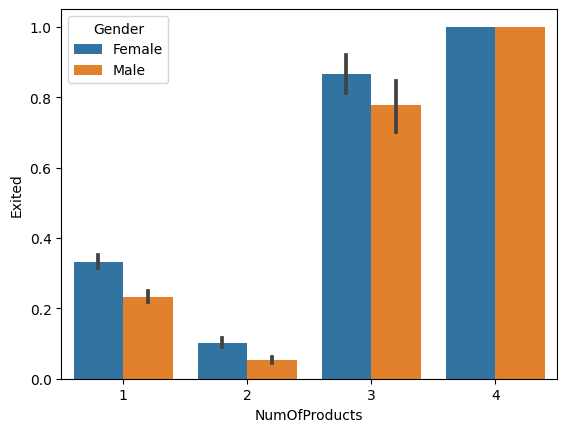

In [18]:
sns.barplot(x= 'NumOfProducts', y = 'Exited',hue='Gender', data = New_dataset)

In [19]:
New_dataset['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<Axes: xlabel='HasCrCard', ylabel='Exited'>

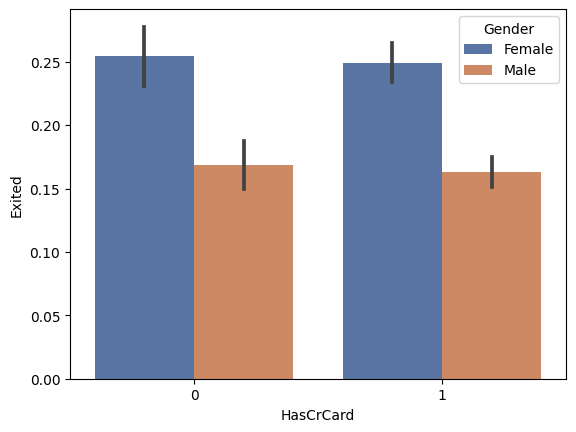

In [20]:
sns.barplot(x= 'HasCrCard', y = 'Exited',hue='Gender', data = New_dataset, palette='deep')

In [21]:
New_dataset['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<Axes: xlabel='IsActiveMember', ylabel='Exited'>

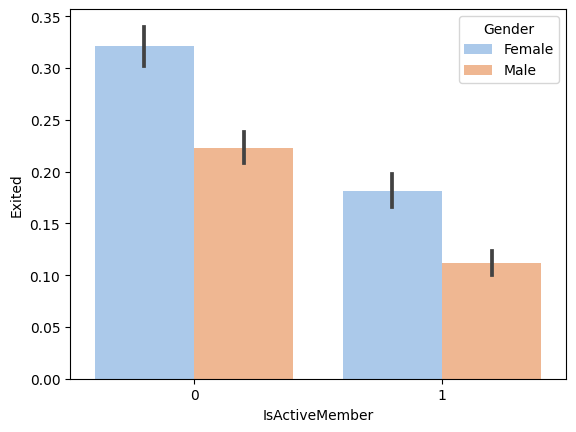

In [22]:
sns.barplot(x= 'IsActiveMember', y = 'Exited',hue='Gender', data = New_dataset, palette='pastel')

<ipython-input-197-bf5c3e61bc65>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = New_dataset.corr()


<Axes: >

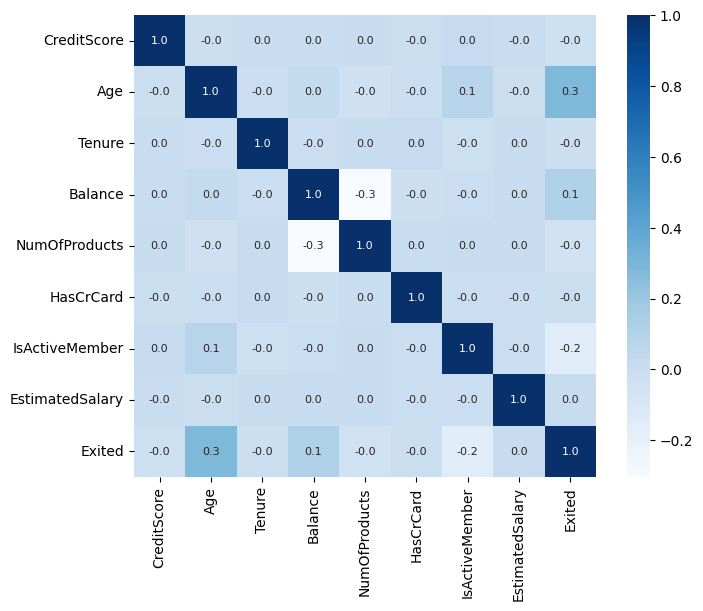

In [197]:
# correlation
# Heat map
correlation = New_dataset.corr()
plt.figure(figsize =(8,6))
sns.heatmap(correlation, cbar = True , square = True , fmt ='.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')


**Handling Imbalance Data**

In [23]:
New_dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [24]:
# seperating the features
Not_Exit = New_dataset[New_dataset.Exited==0]
Exit = New_dataset[New_dataset.Exited==1]
print(Not_Exit.shape, Exit.shape)

(7963, 11) (2037, 11)


In [71]:
# under sampling
new_NE = Not_Exit.sample(n=4500)
print(new_NE.shape)

(4500, 11)


In [72]:
# concatenate 2 dataframes
Ds = pd.concat([new_NE,Exit], axis =0)
print(Ds.shape)

(6537, 11)


In [73]:
Ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1271,723,France,Male,42,2,99095.73,1,1,1,17512.53,0
4315,632,Germany,Male,30,1,58668.02,1,1,1,78670.52,0
7393,599,France,Male,28,7,119706.22,1,0,0,31190.42,0
1769,607,Germany,Male,39,2,84468.67,2,1,1,121945.42,0
527,610,France,Male,26,8,0.00,2,1,0,166031.08,0


**Label Encoding**

In [74]:
Ds['Gender'].value_counts()

Male      3480
Female    3057
Name: Gender, dtype: int64

In [75]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(Ds.Gender)
Ds['Gender']= labels
Ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1271,723,France,1,42,2,99095.73,1,1,1,17512.53,0
4315,632,Germany,1,30,1,58668.02,1,1,1,78670.52,0
7393,599,France,1,28,7,119706.22,1,0,0,31190.42,0
1769,607,Germany,1,39,2,84468.67,2,1,1,121945.42,0
527,610,France,1,26,8,0.00,2,1,0,166031.08,0


In [76]:
Ds['Gender'].value_counts()   # 1 rep male, 0 rep female

1    3480
0    3057
Name: Gender, dtype: int64

In [77]:
Ds['Geography'].value_counts()

France     3178
Germany    1767
Spain      1592
Name: Geography, dtype: int64

In [78]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(Ds.Geography)
Ds['Geography']= labels
Ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1271,723,0,1,42,2,99095.73,1,1,1,17512.53,0
4315,632,1,1,30,1,58668.02,1,1,1,78670.52,0
7393,599,0,1,28,7,119706.22,1,0,0,31190.42,0
1769,607,1,1,39,2,84468.67,2,1,1,121945.42,0
527,610,0,1,26,8,0.00,2,1,0,166031.08,0


In [79]:
Ds['Geography'].value_counts()  # 0 rep france, 1 rep germany, 2 rep spain

0    3178
1    1767
2    1592
Name: Geography, dtype: int64

**Splitting the Data**

In [80]:
# split into target and feature value
x = Ds.drop(columns ='Exited', axis = 1)
y = Ds['Exited']


In [81]:
print(x)
print(y)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1271          723          0       1   42       2   99095.73              1   
4315          632          1       1   30       1   58668.02              1   
7393          599          0       1   28       7  119706.22              1   
1769          607          1       1   39       2   84468.67              2   
527           610          0       1   26       8       0.00              2   
...           ...        ...     ...  ...     ...        ...            ...   
9981          498          1       1   42       3  152039.70              1   
9982          655          1       0   46       7  137145.12              1   
9991          597          0       0   53       4   88381.21              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   

      HasCrCard  IsActiveMember  EstimatedSalary  


**Data Standardization**

In [105]:
scaler = StandardScaler()
x_stand = scaler.fit_transform(x)
print(x_stand)

[[ 0.76296561 -0.92471663  0.93725572 ...  0.65010253  1.01774967
  -1.43379378]
 [-0.17996385  0.2962231   0.93725572 ...  0.65010253  1.01774967
  -0.37155417]
 [-0.5219053  -0.92471663  0.93725572 ... -1.53821891 -0.98255989
  -1.19622554]
 ...
 [-0.54262902 -0.92471663 -1.06694468 ...  0.65010253 -0.98255989
  -0.53283735]
 [ 0.61789954 -0.92471663 -1.06694468 ... -1.53821891  1.01774967
  -1.00698991]
 [ 1.27069685  0.2962231   0.93725572 ...  0.65010253 -0.98255989
  -0.12460487]]


In [106]:
x = x_stand
print(x,y)

[[ 0.76296561 -0.92471663  0.93725572 ...  0.65010253  1.01774967
  -1.43379378]
 [-0.17996385  0.2962231   0.93725572 ...  0.65010253  1.01774967
  -0.37155417]
 [-0.5219053  -0.92471663  0.93725572 ... -1.53821891 -0.98255989
  -1.19622554]
 ...
 [-0.54262902 -0.92471663 -1.06694468 ...  0.65010253 -0.98255989
  -0.53283735]
 [ 0.61789954 -0.92471663 -1.06694468 ... -1.53821891  1.01774967
  -1.00698991]
 [ 1.27069685  0.2962231   0.93725572 ...  0.65010253 -0.98255989
  -0.12460487]] 1271    0
4315    0
7393    0
1769    0
527     0
       ..
9981    1
9982    1
9991    1
9997    1
9998    1
Name: Exited, Length: 6537, dtype: int64


**Splitting training and testing data**

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,stratify=y, random_state=3)
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(6537, 10) (5229, 10) (1308, 10)
(6537,) (5229,) (1308,)


**Model Training**

**Logistic Regression**

In [137]:
lg = LogisticRegression(max_iter=2000)
lg.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [188]:
x_test_pred1 = lg.predict(x_test)
y_train_pred1 = lg.predict(x_train)
acc1 = accuracy_score(y_train, y_train_pred1)
accuracy1 = accuracy_score(y_test, x_test_pred1)
precision1 = precision_score(y_test, x_test_pred1)
recall1 = recall_score(y_test, x_test_pred1)
f1_1 = f1_score(y_test, x_test_pred1)
print('Accuracy of training data:',acc1)
print("Accuracy of testing data:", accuracy1)
print("Precision:", precision1)
print ("Recall", recall1)
print ("f1:", f1_1)

Accuracy of training data: 0.7435456110154905
Accuracy of testing data: 0.7385321100917431
Precision: 0.6231343283582089
Recall 0.40931372549019607
f1: 0.4940828402366864


**Random Forest Classifier**

In [122]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [141]:
x_test_pred2 = rfc.predict(x_test)
accuracy2 = accuracy_score(y_test, x_test_pred2)
precision2 = precision_score(y_test, x_test_pred2)
recall2 = recall_score(y_test, x_test_pred2)
f1_2 = f1_score(y_test, x_test_pred2)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print ("Recall", recall2)
print ("f1:", f1_2)

Accuracy: 0.8165137614678899
Precision: 0.7608695652173914
Recall 0.6004901960784313
f1: 0.6712328767123288


**Hyperparameter tuning **

In [125]:
# no of tress in rfc
n_estimators = [int(x) for x in np.linspace(start =10, stop=500, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 500,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 9, 15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

In [126]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)


{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [2, 9, 15, 20], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [127]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(x_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 9, 15, 20],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   random_state=100, verbose=2)

In [128]:
rf_randomcv.best_params_

{'n_estimators': 64,
 'min_samples_split': 9,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 336,
 'criterion': 'gini'}

In [181]:
best_random_grid=rf_randomcv.best_estimator_
y_pred1=best_random_grid.predict(x_test)
y_train_pred2 =best_random_grid.predict(x_train)

In [183]:
acc2 = accuracy_score(y_train, y_train_pred2)
print('Accuracy:', acc2)

Accuracy: 0.9047619047619048


In [184]:
accuracy2 = accuracy_score(y_test, y_pred1)
precision2 = precision_score(y_test, y_pred1)
recall2 = recall_score(y_test, y_pred1)
f1_2 = f1_score(y_test, y_pred1)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print ("Recall", recall2)
print ("f1:", f1_2)

Accuracy: 0.8256880733944955
Precision: 0.7884615384615384
Recall 0.6029411764705882
f1: 0.6833333333333333


In [143]:
# confusion matrix
cf_matrix1 = confusion_matrix(y_test, y_pred1)
print(cf_matrix1)
tn,fp,fn,tp= cf_matrix1.ravel()
print(tn,fp,fn,tp)

[[834  66]
 [162 246]]
834 66 162 246


Text(33.222222222222214, 0.5, 'Correct Label')

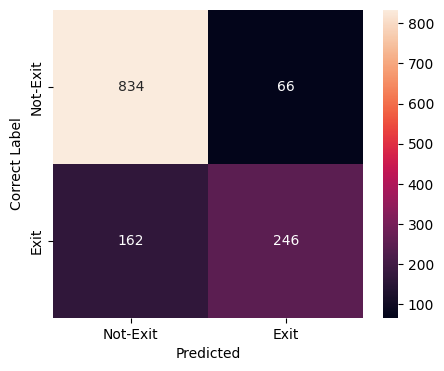

In [144]:
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix1, annot=True, xticklabels=["Not-Exit","Exit"],
            yticklabels=["Not-Exit","Exit"], fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Correct Label')

**3) Gradient Boosting Classifier**

In [145]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [147]:
x_test_pred3 = gbc.predict(x_test)
accuracy3 = accuracy_score(y_test, x_test_pred3)
precision3 = precision_score(y_test, x_test_pred3)
recall3 = recall_score(y_test, x_test_pred3)
f1_3 = f1_score(y_test, x_test_pred3)
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print ("Recall", recall3)
print ("f1:", f1_3)

Accuracy: 0.8287461773700305
Precision: 0.7787878787878788
Recall 0.6299019607843137
f1: 0.6964769647696477


**Hyperparameter Tuning**

In [158]:
gb = GradientBoostingClassifier()

In [161]:
parameters = {"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : [int(x) for x in np.linspace(start =10, stop=500, num=10)],
                  "max_depth"    : sp_randInt(4, 10)
                 }
gb_randomcv = RandomizedSearchCV(estimator=gb, param_distributions = parameters,
                               cv = 3, n_iter = 100, n_jobs=-1)
gb_randomcv.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fea015203d0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fea019ec7c0>,
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe9ff29d180>})

In [162]:
gb_randomcv.best_params_

{'learning_rate': 0.12316633235408025,
 'max_depth': 4,
 'n_estimators': 64,
 'subsample': 0.580269019403554}

In [176]:
best_random_grid1=gb_randomcv.best_estimator_
y_pred3=best_random_grid1.predict(x_test)
y_train_pred3 = best_random_grid1.predict(x_train)


In [175]:
# accuracy for train data
acc3 = accuracy_score( y_train, y_train_pred3)
print("Accuracy:", acc3)


Accuracy: 0.8450946643717728


In [177]:
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f1_3= f1_score(y_test, y_pred3)
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print ("Recall", recall3)
print ("f1:", f1_3)

Accuracy: 0.8287461773700305
Precision: 0.772189349112426
Recall 0.6397058823529411
f1: 0.6997319034852546


In [164]:
# Confusion Matrix
cf_matrix3 = confusion_matrix(y_test, y_pred3)
print(cf_matrix3)
tn2,fp2,fn2,tp2= cf_matrix3.ravel()
print(tn2,fp2,fn2,tp2)

[[823  77]
 [147 261]]
823 77 147 261


Text(33.222222222222214, 0.5, 'Correct Label')

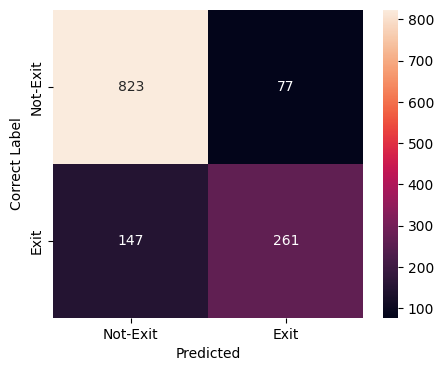

In [165]:
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix3, annot=True, xticklabels=["Not-Exit","Exit"],
            yticklabels=["Not-Exit","Exit"], fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Correct Label')

In [166]:
final_data = pd.DataFrame({'Models':['logestic regression','Random Forest Classifer','gradient boosting classifier'],'Accuracy':[accuracy1,accuracy2,accuracy3],'Precision':[precision1,precision2,precision3],'Recall':[recall1,recall2,recall3],'F1':[f1_1,f1_2,f1_3]})
print(final_data)

                         Models  Accuracy  Precision    Recall        F1
0           logestic regression  0.738532   0.623134  0.409314  0.494083
1       Random Forest Classifer  0.825688   0.788462  0.602941  0.683333
2  gradient boosting classifier  0.828746   0.772189  0.639706  0.699732


<Axes: xlabel='Models', ylabel='Accuracy'>

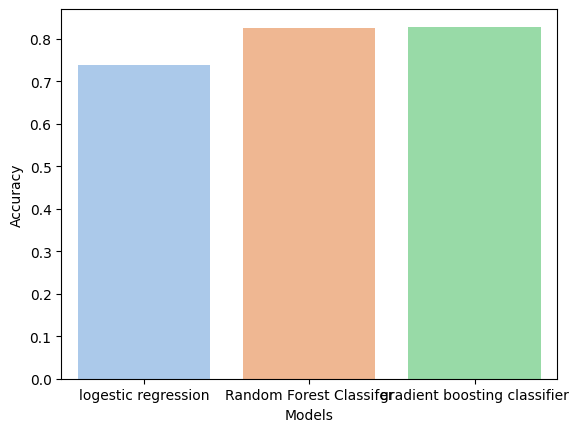

In [167]:
sns.barplot(x= 'Models', y = 'Accuracy', data =final_data, palette='pastel')

In [192]:
final_data_acc = pd.DataFrame({'Models':['logestic regression','Random Forest Classifer','gradient boosting classifier'],'Acc Training data':[acc1,acc2,acc3],'Acc Testing data':[accuracy1,accuracy2,accuracy3]})

In [193]:
print(final_data_acc)

                         Models  Acc Training data  Acc Testing data
0           logestic regression           0.743546          0.738532
1       Random Forest Classifer           0.904762          0.825688
2  gradient boosting classifier           0.845095          0.828746


In [168]:
joblib.dump(gb, 'Churn_prediction')

['Churn_prediction']

In [171]:
model = joblib.load('Churn_prediction')